Libraries and Style Files
-------------------------

In [1]:
from pathlib import Path
import sys
import importlib

# Notebook working directory and set up file paths
NOTEBOOK_DIR = Path.cwd()          
TOP_DIR = NOTEBOOK_DIR.parent.parent
LIB_DIR = TOP_DIR / "python"

# Add python library folder to sys.path
if str(LIB_DIR) not in sys.path:
    sys.path.insert(0, str(LIB_DIR))

# Import Libraries
import ENDF6el as endfel
import shielding as sh
import ENDF6

# remove when done editing shielding lib
importlib.reload(sh)

from matplotlib import pyplot as plt
plt.style.use(str(TOP_DIR/"mplstyles"/"stylelib"/"standard.mplstyle"))  

# Computational libraries
import numpy as np
import scipy
import scipy.integrate as integrate


SNOLAB Flux from Slab Source Calculations
=========================================

In the notebook `B-SOURCES4A-Running.ipynb` in this directory we figured out how many neutrons were produced per volume per second of shotcrete--the material that surrounds the SNOLAB cavern. In order to calculate the ambient neutron flux (in units of neutrons/cm$^2$/s), however, we must combine this knowledge with some basic neutron transport.  

XXXXXXXXXXX
-----------



neutrons and gammas treated the same in terms of flux sources

instead of absorption cross section, put in total cross section for neutrons, ignoring multiple scattering

infinite slab??

Rectangular volume source with exterior detector point:
Semi Analytic paper pg 131

mu_s can be set to macroscopic neutron total cross section - energy dependent (elastic cross section?)

we'd want to input the starting distributions of neutron energys

take the shielding.py functions and make them so they return a function of E

mu's refer to attenuation

attenuation refers to total macroscopic elastic cross section

what comes out of txt files is microscocpic 




In [2]:
En = np.geomspace(1e-11, 100, 1000) 

f = open(str(TOP_DIR/'data_files'/'xn_data'/'n-014_Si_028.endf'))
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=4, MT=2)

# elastic angular distributions.
#x, y = ENDF6.read_table(sec)


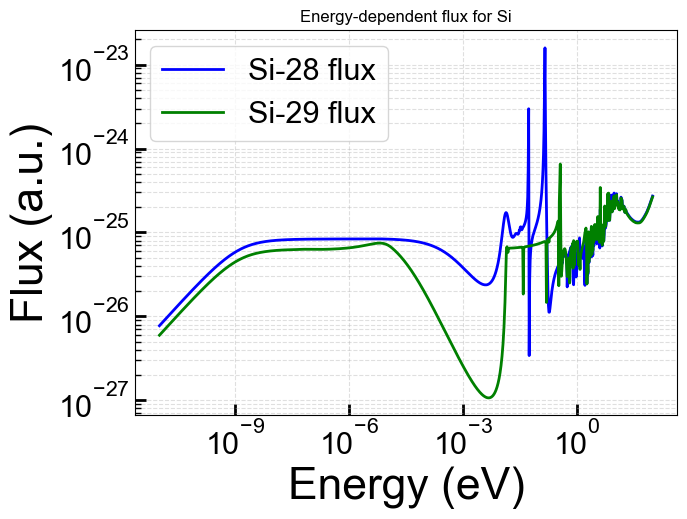

In [3]:
#from sh import Edep28
a=1
l1=2
l2=2
l3=2

plt.figure(figsize=(7,5))
plt.plot(En, sh.Edep28(a,l1,l2,l3,En), label="Si-28 flux", color="blue")
plt.plot(En, sh.Edep29(a,l1,l2,l3,En), label="Si-29 flux", color ="green")

plt.xscale("log")      
plt.yscale("log")     
plt.xlabel("Energy (eV)")
plt.ylabel("Flux (a.u.)")
plt.title("Energy-dependent flux for Si")
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.legend()


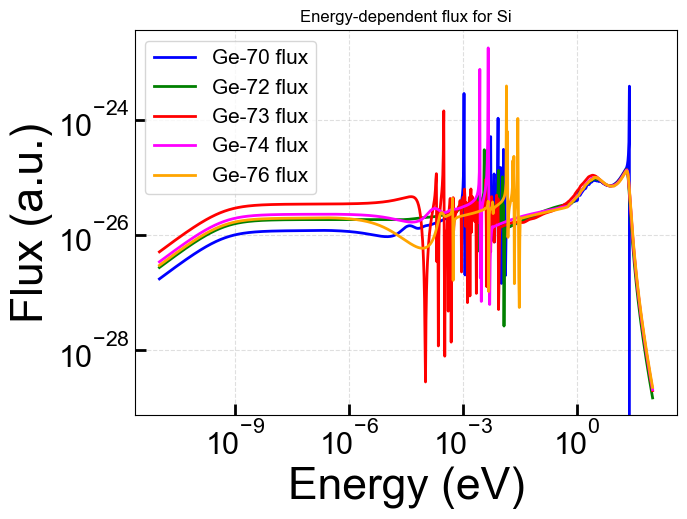

In [7]:
plt.figure(figsize=(7,5))
plt.plot(En, sh.Edep70(a,l1,l2,l3,En), label="Ge-70 flux", color="blue")
plt.plot(En, sh.Edep72(a,l1,l2,l3,En), label="Ge-72 flux", color ="green")
plt.plot(En, sh.Edep73(a,l1,l2,l3,En), label="Ge-73 flux", color ="red")
plt.plot(En, sh.Edep74(a,l1,l2,l3,En), label="Ge-74 flux", color ="magenta")
plt.plot(En, sh.Edep76(a,l1,l2,l3,En), label="Ge-76 flux", color ="orange")


plt.xscale("log")      
plt.yscale("log")     
plt.xlabel("Energy (eV)")
plt.ylabel("Flux (a.u.)")
plt.title("Energy-dependent flux for Si")
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.legend(loc=2, fontsize=15)